In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report 
from sklearn import svm
from sklearn.svm import SVR,SVC
import matplotlib.pyplot as plt
from keras import models, layers
from sklearn import svm
from sklearn.model_selection import cross_val_score
import statistics

Using TensorFlow backend.


In [2]:
data = pd.read_csv('outputs/Net_0.25_aws-sdk-mock.csv',header=0)
with open('project_names.txt') as f:
    names = f.read().splitlines()

In [3]:
columns=["PR","Pred_eval","Real_eval", "Leader",'In-degree','Net_ind','Net_recip','Net_trans','Comments','Merged?','Created_at','Updated_at','Closed_at']
X_columns_train = ['In-degree','Net_ind','Net_recip','Net_trans']
Y_columns_train = ['Merged?']

X = pd.DataFrame(columns=X_columns_train)
Y = pd.DataFrame(columns=Y_columns_train)

print(Y)

for name in names:      
    data = pd.read_csv('outputs/Net_0.25_%s.csv'%(name),header=None)
    #print(data.shape[0])
    ten_percent = data.shape[0]/10
    #print(X.shape)
    X = X.append(data.loc[ten_percent: , 4:9])
    Y = Y.append(data.loc[ten_percent: , 9:9])

export_csv = X.to_csv('outputs/all.csv', index = None, header=True)

Empty DataFrame
Columns: [Merged?]
Index: []


In [6]:
print(X)

      4                      5                    6                    7   8  \
18    3      0.153958955647005                  0.0                  1.0   0   
19    3     0.1598709339028349                  0.0                  1.0   4   
20    1    0.12793130247689963                  0.0                    0   6   
21    1    0.08462604442794185                  0.0                    0   5   
22    1    0.07935094499989141                  0.0   0.4666666666666667   2   
23    1    0.07131487875492723                  0.0                    0  10   
24    1    0.05799333096115411                  0.0                    0  15   
25    1   0.054826996366727145                  0.0                    0   2   
26    1   0.051977239229024946                  0.0                    0   8   
27    4     0.0734419267794639  0.36363636363636365   0.3611111111111111   4   
28    1   0.048704785138103585                  0.0                    0   7   
29    0   0.046015383223703715          

In [7]:
data = pd.read_csv('outputs/all.csv',header=0)
columns=["PR","Pred_eval","Real_eval", "Leader",'In-degree','Net_ind','Net_recip','Net_trans','Comments','Merged?','Created_at','Updated_at','Closed_at']
X_columns_train = ['In-degree','Net_ind','Net_recip','Net_trans']
Y_columns_train = ['Merged?']

X = data[X_columns_train]
Y = data[Y_columns_train]
print(X.shape, Y.shape)

(12124, 4) (12124, 1)


In [11]:
t =0
f =0
for item in Y['Merged?']:
    if item==1:
        t+=1
    else:
        f+=1
print("True:%s, False:%s"%(t,f))

True:4912, False:7212


In [12]:
## Train SVM
clf_rbf = SVC(kernel="rbf", C=1e2, gamma=0.01)
clf_lin = SVC(kernel="linear", C=1e2)
clf_poly = SVC(kernel="poly",  C=1e2, degree=2)

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.10)
#clf_lin.fit(X_train, Y_train)
#clf_rbf.fit(X_train, Y_train)
#clf_poly.fit(X_train, Y_train)

scores = cross_val_score(clf_lin, X, Y, cv=10)
print("SVC linear", statistics.mean(scores))
#Y_test_pred = clf_lin.predict(X_test)
#print("Test Accuracy:",accuracy_score(Y_test, Y_test_pred))
print("\n\n")
"""
scores = cross_val_score(clf_rbf, X, Y, cv=10)
print("SVC rbf", statistics.mean(scores))
#Y_test_pred = clf_rbf.predict(X_test)
#print("Test Accuracy:",accuracy_score(Y_test, Y_test_pred))
print("\n\n")

scores = cross_val_score(clf_poly, X, Y, cv=10)
print("SVC poly", statistics.mean(scores))
#Y_test_pred = clf_poly.predict(X_test)
#print("Test Accuracy:",accuracy_score(Y_test, Y_test_pred))
print("\n\n")
"""

"""
print("Test Accuracy:",accuracy_score(Y_test, Y_test_pred))
print("Train Accuracy:",accuracy_score(Y_train, Y_train_pred))
print("Test Recall:", recall_score(Y_test, Y_test_pred))
print("Train Recall:", recall_score(Y_train, Y_train_pred))
print("Test Precision:",precision_score(Y_test, Y_test_pred))
print("Train Precision:",precision_score(Y_train, Y_train_pred))
"""

In [14]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.10)
#clf_reg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, Y_train)
#scores = cross_val_score(clf_reg, X, Y, cv=5)
#print(scores)
import statistics
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
predicted = cross_val_score(logreg, X, Y, cv=10)
print (predicted)
print (statistics.mean(predicted))
#print (classification_report(Y, predicted))


[0.57001647 0.51565074 0.60726073 0.87788779 0.73019802 0.41584158
 0.63861386 0.66914191 0.67161716 0.73514851]
0.6431376786772581


In [15]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
activation = 'relu'
#activation = 'tanh'
#activation = 'softmax'


network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation=activation, input_shape=(X.shape[1],)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation=activation))
# Add fully connected layer with no activation function
network.add(layers.Dense(units=1,activation='sigmoid'))
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y,   test_size=0.10)
X_train, X_tmp, Y_train, Y_tmp = train_test_split(X, Y, test_size=1 - train_ratio)
X_val, X_test, Y_val, Y_test = train_test_split(X_tmp, Y_tmp, test_size=test_ratio/(test_ratio + validation_ratio))

    
result = network.fit(X_train, # Features
                  Y_train, # Target vector
                  epochs=100, # Number of epochs
                  verbose=0, # with output
                  batch_size=10, 
                  validation_data=(X_val, Y_val)) # Data for evaluation



In [40]:
print("Result:", statistics.mean(result.history['acc']))

eval_model=network.evaluate(X_train, Y_train)
print(eval_model)

prediction_nn_test=network.predict(X_test)
prediction_nn_test =(y_pred>0.5)
#print(prediction_nn_test)
prediction_nn_train=network.predict(X_train)
prediction_nn_train =(prediction_nn_train>0.5)
#print(prediction_nn_train)

prediction_nn_all=network.predict(X)
prediction_nn_all =(prediction_nn_all>0.5)

print("Test Accuracy:",accuracy_score(Y_test, prediction_nn_test))
print("Train Accuracy:",accuracy_score(Y_train, prediction_nn_train))


Result: 0.6946739269629814
9093/9093 [==============================] - 0s 26us/step
[0.5638625858627923, 0.7224238425227762]
Test Accuracy: 0.5111294311624073
Train Accuracy: 0.7224238425162213


In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction_nn_test)
print(cm)

[[425 283]
 [310 195]]


Train: 0.722, Test: 0.725


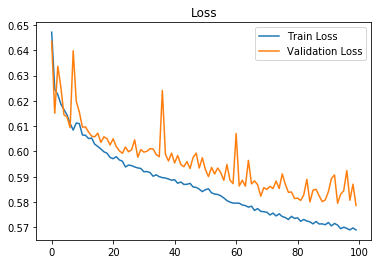

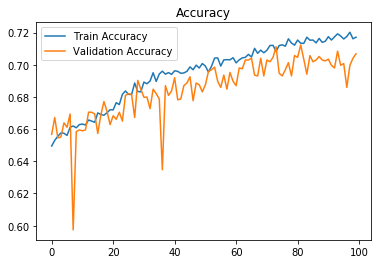

F1 score: 0.638528
Accuracy: 0.724650
Precision: 0.704057
Recall: 0.584158


In [38]:
from matplotlib import pyplot
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
prediction_nn_test = network.predict([X_test])
prediction_nn_train = network.predict([X_train])

# evaluate the model
_, train_acc = network.evaluate(X_train, Y_train, verbose=0)
_, test_acc = network.evaluate(X_test, Y_test, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot()
pyplot.title('Loss')
pyplot.plot(result.history['loss'], label='Train Loss')
pyplot.plot(result.history['val_loss'], label='Validation Loss')
pyplot.legend()
filename = "nn2.png"
pyplot.savefig(filename, dpi=1000)
pyplot.show()


# plot accuracy during training
pyplot.subplot()
pyplot.title('Accuracy')
pyplot.plot(result.history['acc'], label='Train Accuracy')
pyplot.plot(result.history['val_acc'], label='Validation Accuracy')
pyplot.legend()
filename = "nn.png"
pyplot.savefig(filename, dpi=1000)
pyplot.show()

yhat_classes = network.predict_classes(X_test, verbose=0)

f1 = f1_score(Y_test, yhat_classes)
print('F1 score: %f' % f1)

accuracy = accuracy_score(Y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

precision = precision_score(Y_test, yhat_classes)
print('Precision: %f' % precision)

recall = recall_score(Y_test, yhat_classes)
print('Recall: %f' % recall)

y_nn_predicted = network.predict_classes(X, verbose=0)


In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test, yhat_classes))
print(classification_report(Y_test, yhat_classes))

[[584 124]
 [210 295]]
              precision    recall  f1-score   support

       False       0.74      0.82      0.78       708
        True       0.70      0.58      0.64       505

   micro avg       0.72      0.72      0.72      1213
   macro avg       0.72      0.70      0.71      1213
weighted avg       0.72      0.72      0.72      1213



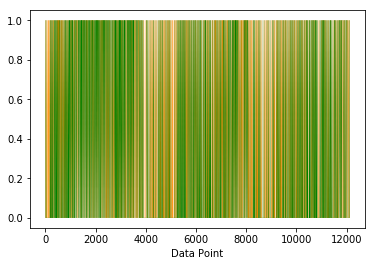

In [45]:
Y_columns = ['Merged?']
index = 0
Y_here = Y['Merged?']
#X_here = X["In-degree"]

# Look at the results
lw = 0.1

X_here = range(0,Y_here.shape[0])
plt.plot(X_here, Y_here, color='darkorange',lw=lw, label='data')
#plt.plot(X_here, , color='Red', lw=lw, label='SVM with Poly kernel')
plt.plot(X_here, prediction_nn_all, color='green', lw=lw,  label='NN prediction')
#plt.plot(X_here,Y_predicted_rbf, color='navy', lw=lw, label='Feedforward NN model')

plt.xlabel('Data Point')
#plt.ylabel(Y_names[index])


filename = "functions.png"
plt.savefig(filename, dpi=700)
plt.show()
